In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
!wget https://www.printonweb.in/images/paper/paper1.webp -O "doc.jpg"

--2023-07-19 12:24:17--  https://www.printonweb.in/images/paper/paper1.webp
Resolving www.printonweb.in (www.printonweb.in)... 172.67.208.165, 104.21.93.98, 2606:4700:3032::6815:5d62, ...
Connecting to www.printonweb.in (www.printonweb.in)|172.67.208.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12866 (13K) [image/webp]
Saving to: ‘doc.jpg’

doc.jpg             100%[===================>]  12.56K  --.-KB/s    in 0s      

2023-07-19 12:24:18 (79.2 MB/s) - ‘doc.jpg’ saved [12866/12866]



In [ ]:

imblur=cv2.GaussianBlur(cv2.imread("doc.jpg"),(5,5),1)
cv2_imshow(imblur)

In [ ]:
IMWIDTH,IMHEIGHT=600,600

In [ ]:
def preprocessing(img):
  imresize=cv2.resize(img,(IMWIDTH,IMHEIGHT))
  imgray=cv2.cvtColor(imresize,cv2.COLOR_BGR2GRAY)
  imblur=cv2.GaussianBlur(imgray,(5,5),1)
  imcanny=cv2.Canny(imblur,100,100)
  imdilate=cv2.dilate(imcanny,(7,7),iterations=2)
  imerode=cv2.erode(imdilate,(5,5),iterations=1)
  return imerode

In [ ]:
imarr=cv2.imread("doc.jpg")
imerode=preprocessing(imarr)

In [ ]:
cv2_imshow(imerode)

In [ ]:
def getContours(img,imgarr_copy):
  contours,hig=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  for cnt in contours:
    area=cv2.contourArea(cnt)
    # print(area)
    all_area=[]
    if area>=1000:
      # cv2.drawContours(imgarr_copy,cnt,-1,(255,0,0),1)
      peri=cv2.arcLength(cnt,True)
      approx=cv2.approxPolyDP(peri,0.02*peri,True)
      objCor=len(approx)
      if objCor>=4:
        x,y,w,h=cv2.boundingRect(approx)
        cv2.drawContours(imgarr_copy,approx,-1,(255,0,0),1)

In [ ]:
# getContours(imerode)

In [ ]:
# !wget https://5.imimg.com/data5/SELLER/Default/2023/4/299433712/WL/WZ/CJ/12932583/a4-certificate-paper-500x500.jpg -O "doc_1.jpg"

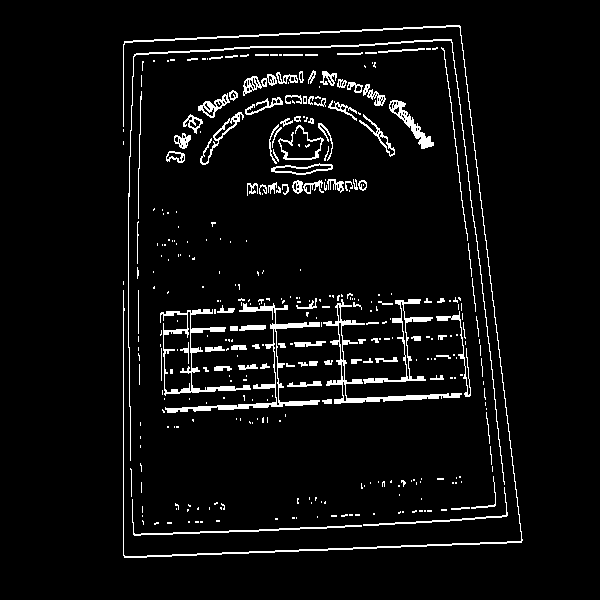

In [ ]:
imarr_doc_1 = cv2.imread("doc_1.jpg")
imgarr_copy=imarr_doc_1.copy()
imeorde=preprocessing(imarr_doc_1)
cv2_imshow(imeorde)

In [ ]:
imarr_doc_1 = cv2.imread("doc_1.jpg")
imgarr_copy=imarr_doc_1.copy()
imeorde=preprocessing(imarr_doc_1)
# cv2_imshow(imeorde)
getContours(imerode,imgarr_copy)
cv2_imshow(imgarr_copy)

In [ ]:
!wget https://raw.githubusercontent.com/kipr/opencv/master/data/haarcascades/haarcascade_eye.xml -O haarcascade_eye.xml

--2023-07-19 13:41:09--  https://raw.githubusercontent.com/kipr/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 506314 (494K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 494.45K  --.-KB/s    in 0.03s   

2023-07-19 13:41:09 (18.3 MB/s) - ‘haarcascade_eye.xml’ saved [506314/506314]



In [ ]:
def to_detect_eye(img_path):
  img=cv2.imread(img_path)
  cascade=cv2.CascadeClassifier("haarcascade_eye.xml")
  imresize=cv2.resize(img,(IMWIDTH,IMHEIGHT))
  imgray=cv2.cvtColor(imresize,cv2.COLOR_BGR2GRAY)
  imblur=cv2.GaussianBlur(imgray,(5,5),1)
  bboxes=cascade.detectMultiScale(imblur,1.0001,4)

  for x,y,w,h in bboxes:
    cv2.rectangle(imresize,(x,y),(x+w,h+y),(255,0,0),1)
  return imresize

In [ ]:
img=to_detect_eye("/content/download (4).jpg")

In [ ]:
cv2_imshow(img)

In [ ]:
!wget https://raw.githubusercontent.com/Maleehak/Car-number-plate-recognition-using-OpenCV/master/haarcascades/haarcascade_russian_plate_number.xml -O haarcascade_russian_plate_number.xml

In [ ]:
!wget https://github.com/Maleehak/Car-number-plate-recognition-using-OpenCV/raw/master/car4.jpg -O car.jpg

In [ ]:
def to_detect_number_plate(img_path,xml_path):
  img=cv2.imread(img_path)
  cascade_number_plate=cv2.CascadeClassifier(xml_path)
  imresize=cv2.resize(img,(IMWIDTH,IMHEIGHT))
  imgray=cv2.cvtColor(imresize,cv2.COLOR_BGR2GRAY)
  imblur=cv2.GaussianBlur(imgray,(5,5),1)
  bboxes=cascade_number_plate.detectMultiScale(imblur,1.1,minNeighbors = 5, minSize=(25,25))
  print(bboxes)
  for x,y,w,h in bboxes:
    cv2.rectangle(imresize,(x,y),(x+w,h+y),(255,0,0),3)
  return imresize

[[136 364 324 108]]


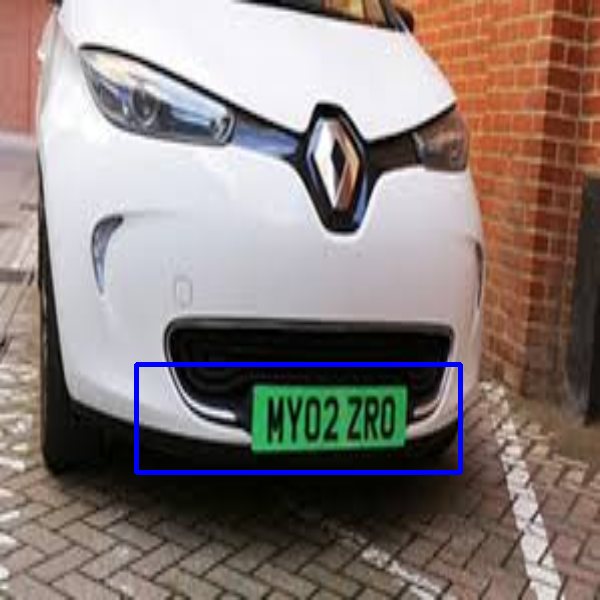

In [ ]:
img=to_detect_number_plate("car.jpg","haarcascade_russian_plate_number.xml")
cv2_imshow(img)

In [ ]:
img.shape

(168, 299, 3)